In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
plt.rcParams['figure.facecolor'] = '#FFEDD8'

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_squared_log_error
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
from sklearn.model_selection import train_test_split, cross_val_score

In [19]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LassoLars, SGDRegressor, Ridge, LogisticRegression, BayesianRidge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

from xgboost import XGBRegressor
import lightgbm as lgb


from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score


In [21]:
set_config(display='diagram') 

import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [25]:
print(f'Number of records (rows) in the dataset are: {df.shape[0]}')
print(f'Number of features (columns) in the dataset are: {df.shape[1]}')

Number of records (rows) in the dataset are: 1460
Number of features (columns) in the dataset are: 81


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [29]:
missing_ratio_df = df.isnull().sum() / df.shape[0]
missing_ratio_df[missing_ratio_df > 0]

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.597260
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [31]:
df_cleaned = df.drop(['Id'], axis = 1)

In [33]:
df_cleaned.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [35]:
df_cleaned.describe(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


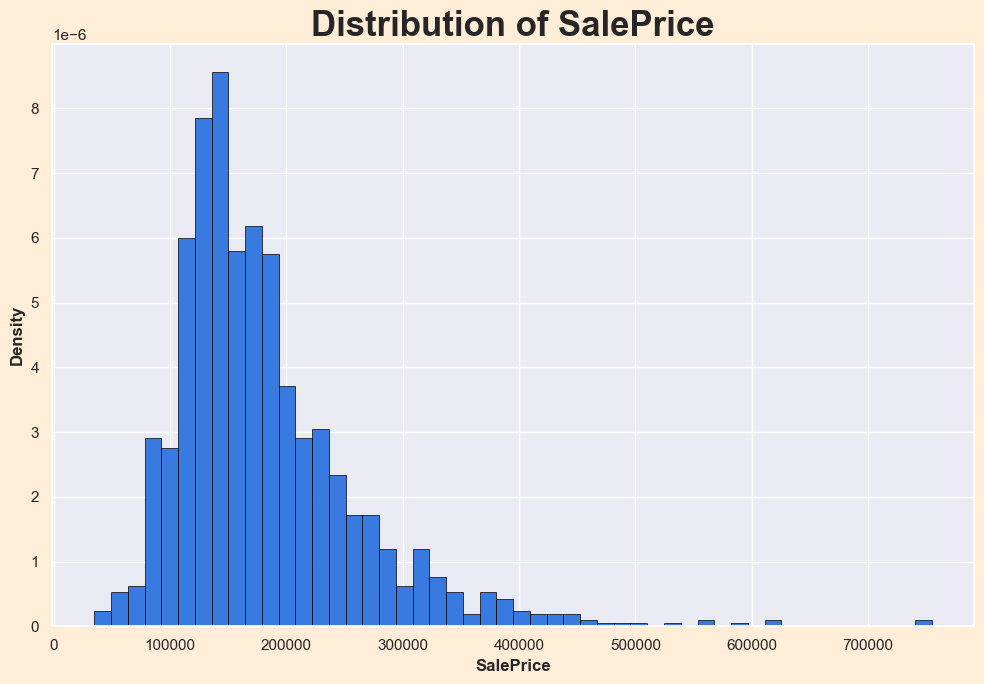

In [51]:
plt.figure(figsize=(10, 7))
plt.hist(df_cleaned['SalePrice'], bins=50, color = '#387ADF', edgecolor = 'black', linewidth = 0.5, density=True)
plt.xlabel('SalePrice', fontweight = 'bold')
plt.ylabel('Density', fontweight = 'bold')
plt.title('Distribution of SalePrice', fontsize = 25, fontweight = 'bold')
plt.tight_layout()
plt.show()

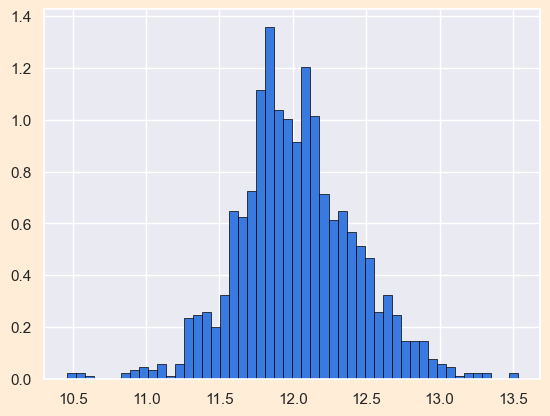

In [53]:
log_price = np.log(df_cleaned['SalePrice'])
plt.hist(log_price, bins=50, color = '#387ADF', edgecolor = 'black', linewidth = 0.5, density=True);

In [55]:
df_cleaned['log_SalePrice'] = log_price
df_cleaned = df_cleaned.drop(['SalePrice'], axis = 1)
df_cleaned.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,log_SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247694
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109011
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317167
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849398
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429216


In [57]:
numerical_df = df_cleaned.select_dtypes(include = ['float64', 'int64'])
numerical_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,log_SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,12.247694
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,12.109011
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,12.317167
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,11.849398
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,12.429216


In [59]:
numerical_df['MasVnrArea']

0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
        ...  
1455      0.0
1456    119.0
1457      0.0
1458      0.0
1459      0.0
Name: MasVnrArea, Length: 1460, dtype: float64

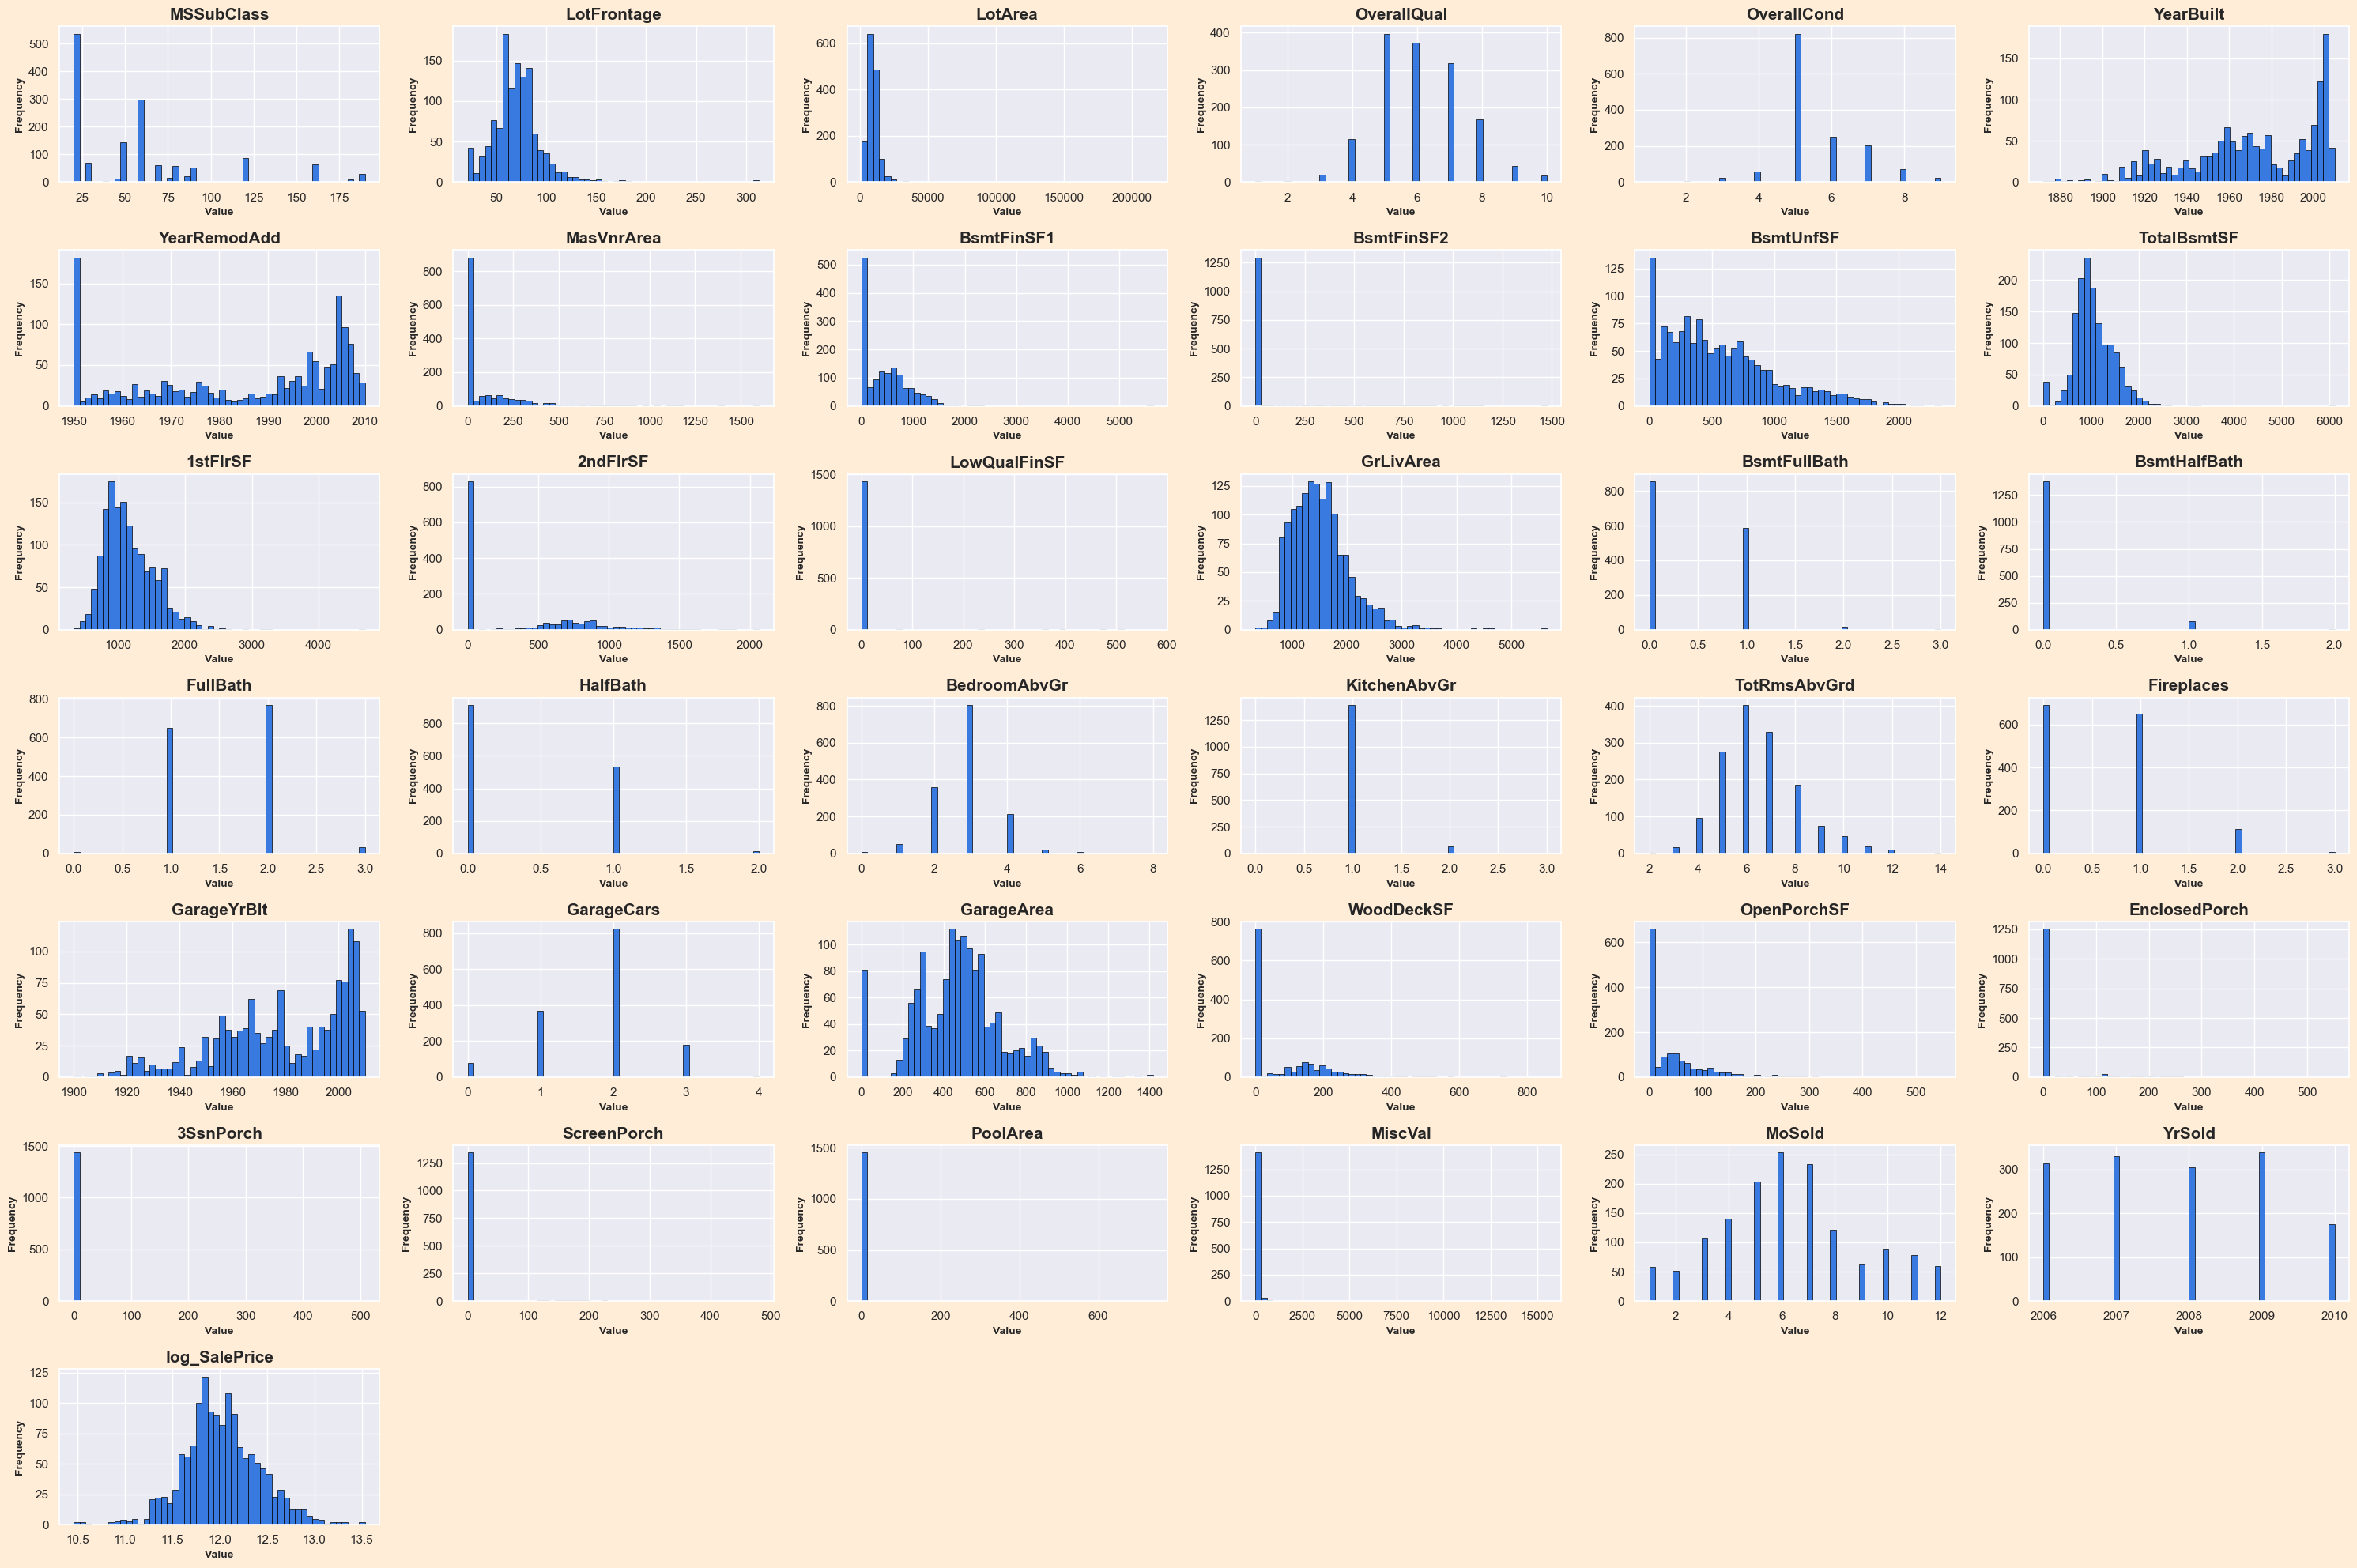

In [61]:
fig, axes = plt.subplots(nrows=len(numerical_df.columns)//6 + 1, ncols=6, figsize=(30, 20))
axes = axes.flatten()

for i, col in enumerate(numerical_df.columns):
    axes[i].hist(numerical_df[col], bins=50, color = '#387ADF', edgecolor = 'black', linewidth = 0.5)
    axes[i].set_title(col, fontsize=15, fontweight = 'bold')
    axes[i].set_xlabel('Value', fontsize=10, fontweight = 'bold')
    axes[i].set_ylabel('Frequency', fontsize=10, fontweight = 'bold')
    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

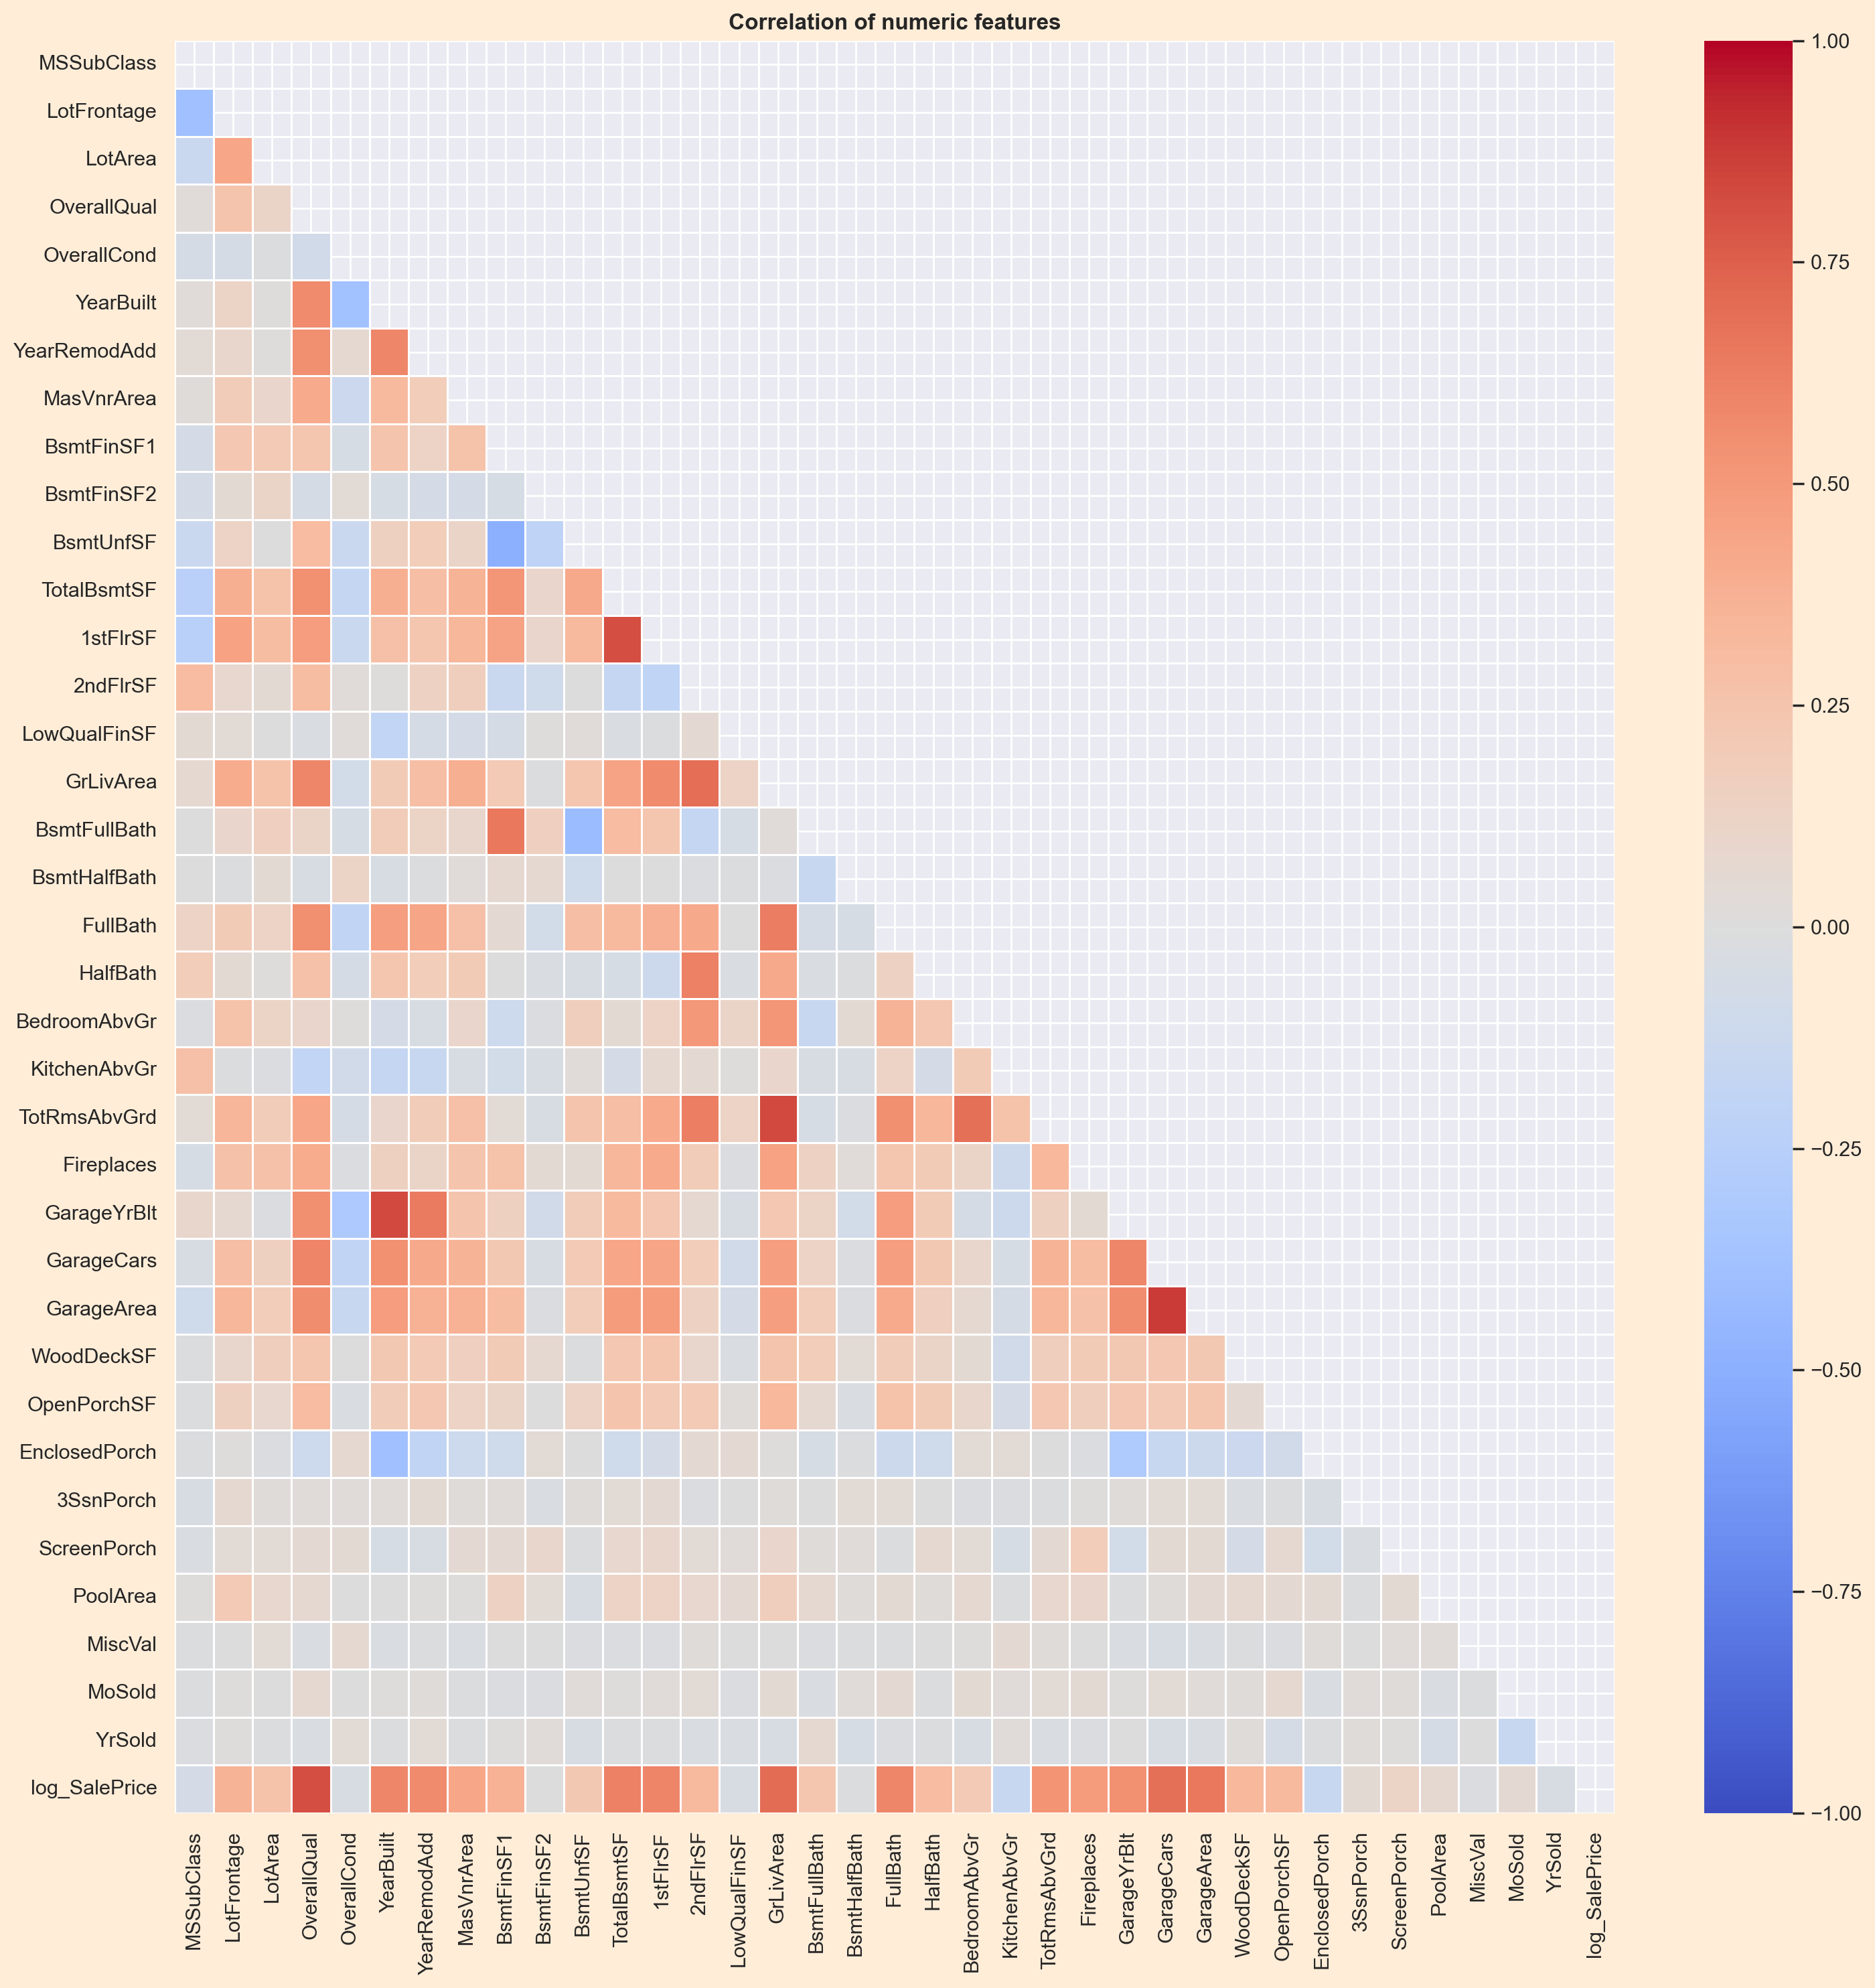

In [63]:
correlation_matrix = numerical_df.corr().round(2)

fig = plt.figure(figsize=(15, 15), facecolor = '#FFEDD8', dpi= 200)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, annot_kws={"size": 5}, cmap='coolwarm', mask = mask, linewidths=0.5)
plt.title(f'Correlation of numeric features', fontweight = 'bold')
plt.tight_layout()
plt.show()

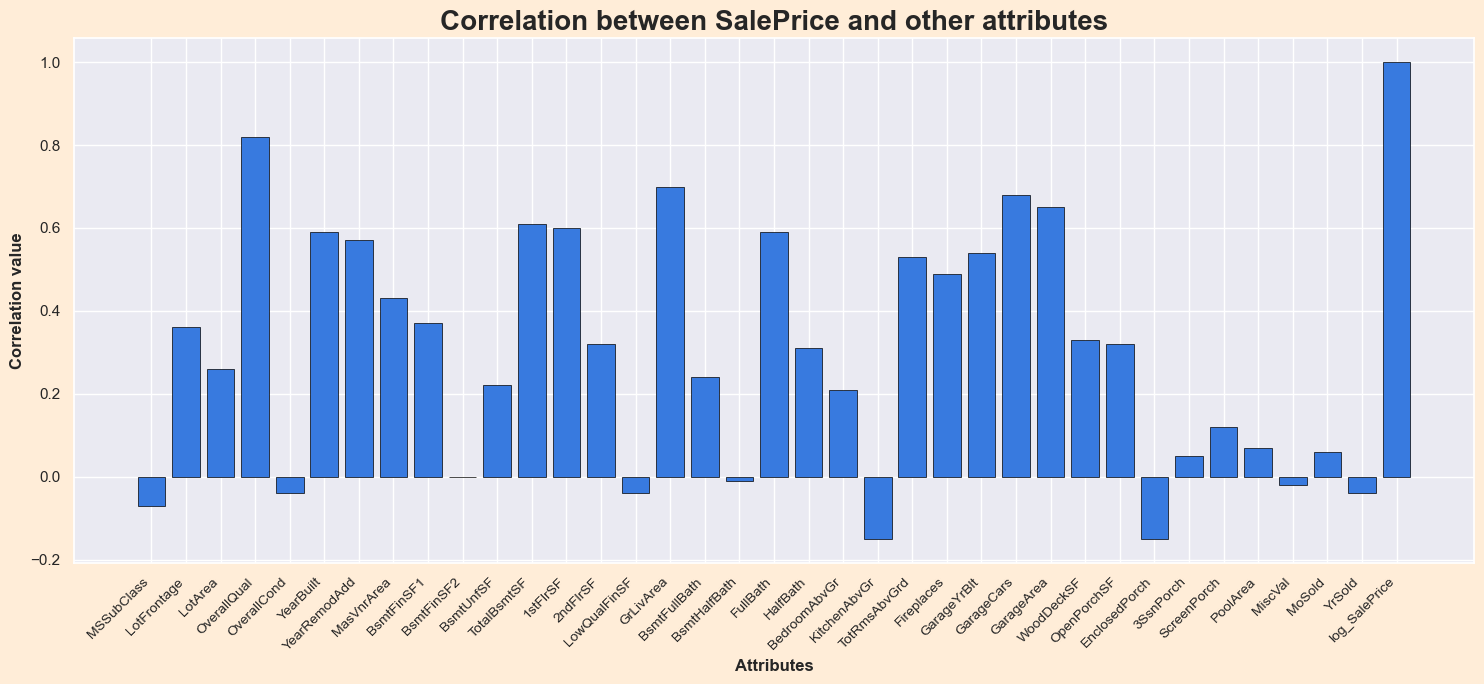

In [65]:
correlation_values = correlation_matrix['log_SalePrice']
plt.figure(figsize=(15, 7))
plt.bar(correlation_values.index, correlation_values.values, color = '#387ADF', edgecolor = 'black', linewidth = 0.5)

plt.title('Correlation between SalePrice and other attributes', fontsize=20, fontweight = 'bold')
plt.xlabel('Attributes', fontsize=12, fontweight = 'bold')
plt.ylabel('Correlation value', fontsize=12, fontweight = 'bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

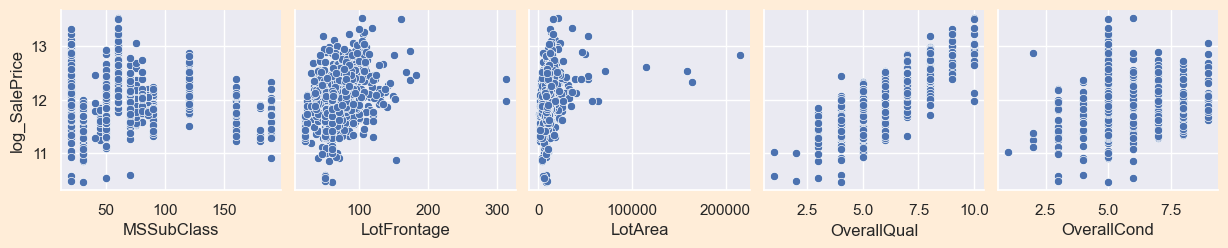

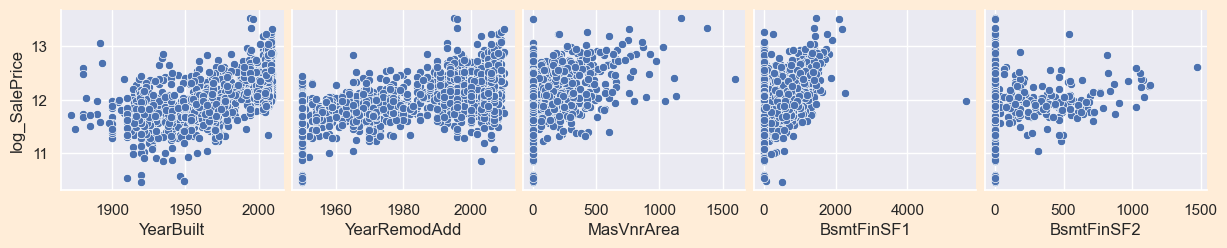

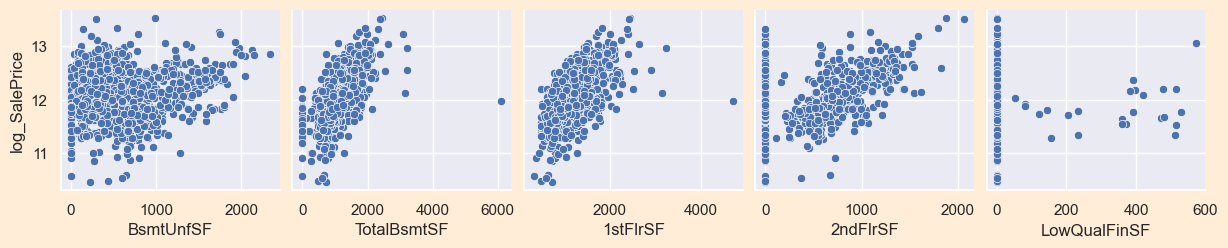

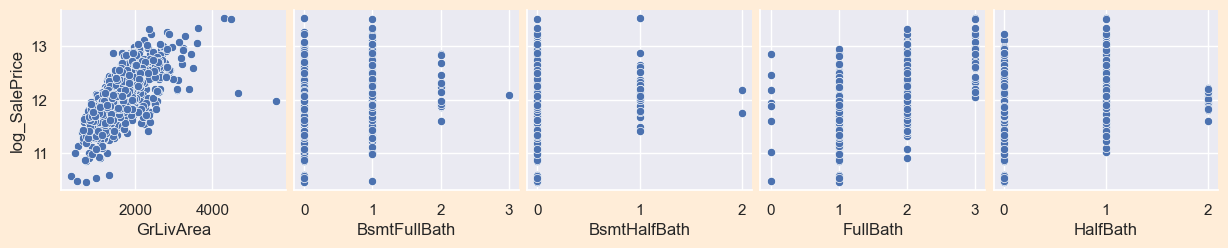

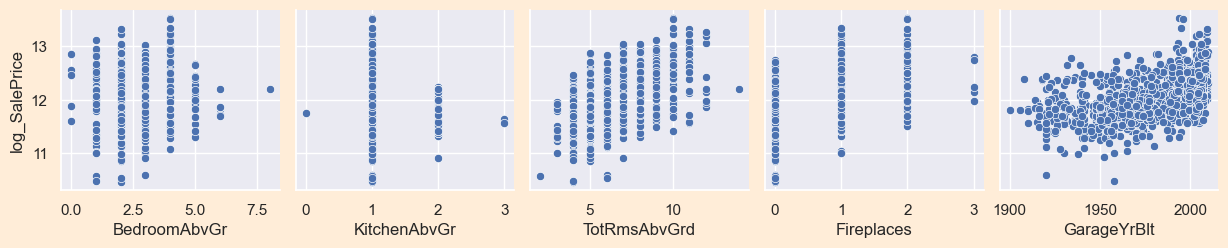

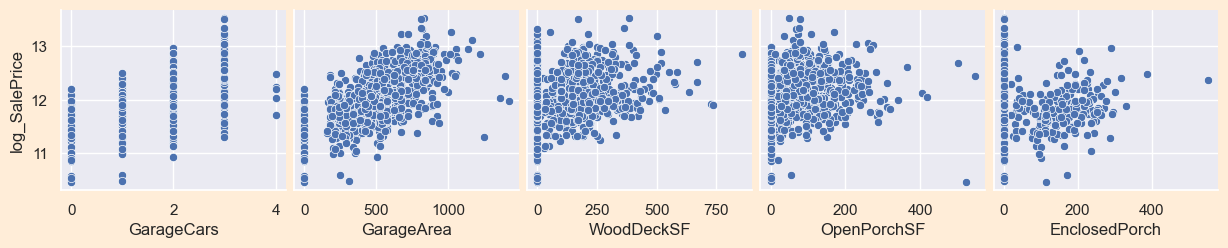

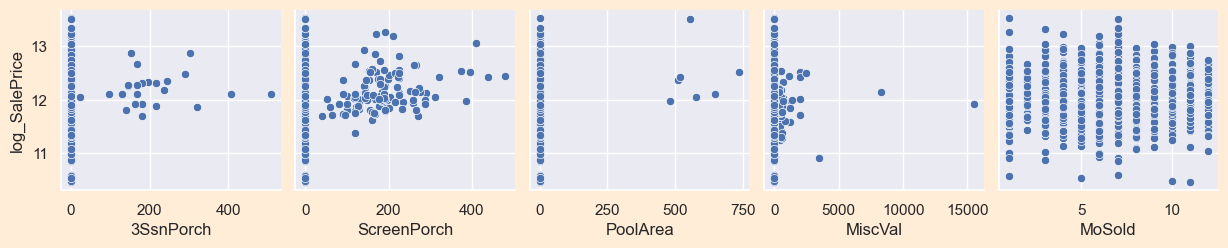

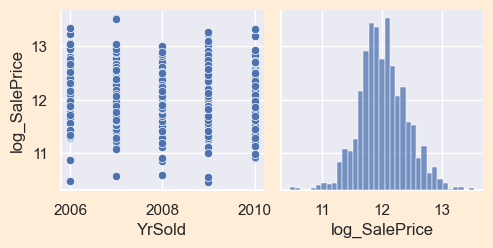

In [67]:
for i in range(0, len(numerical_df.columns), 5):
    sns.pairplot(data=numerical_df,
                x_vars=numerical_df.columns[i:i+5],
                y_vars=['log_SalePrice'])

In [69]:
categorical_df = df_cleaned.select_dtypes(include = ['O'])
categorical_df.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


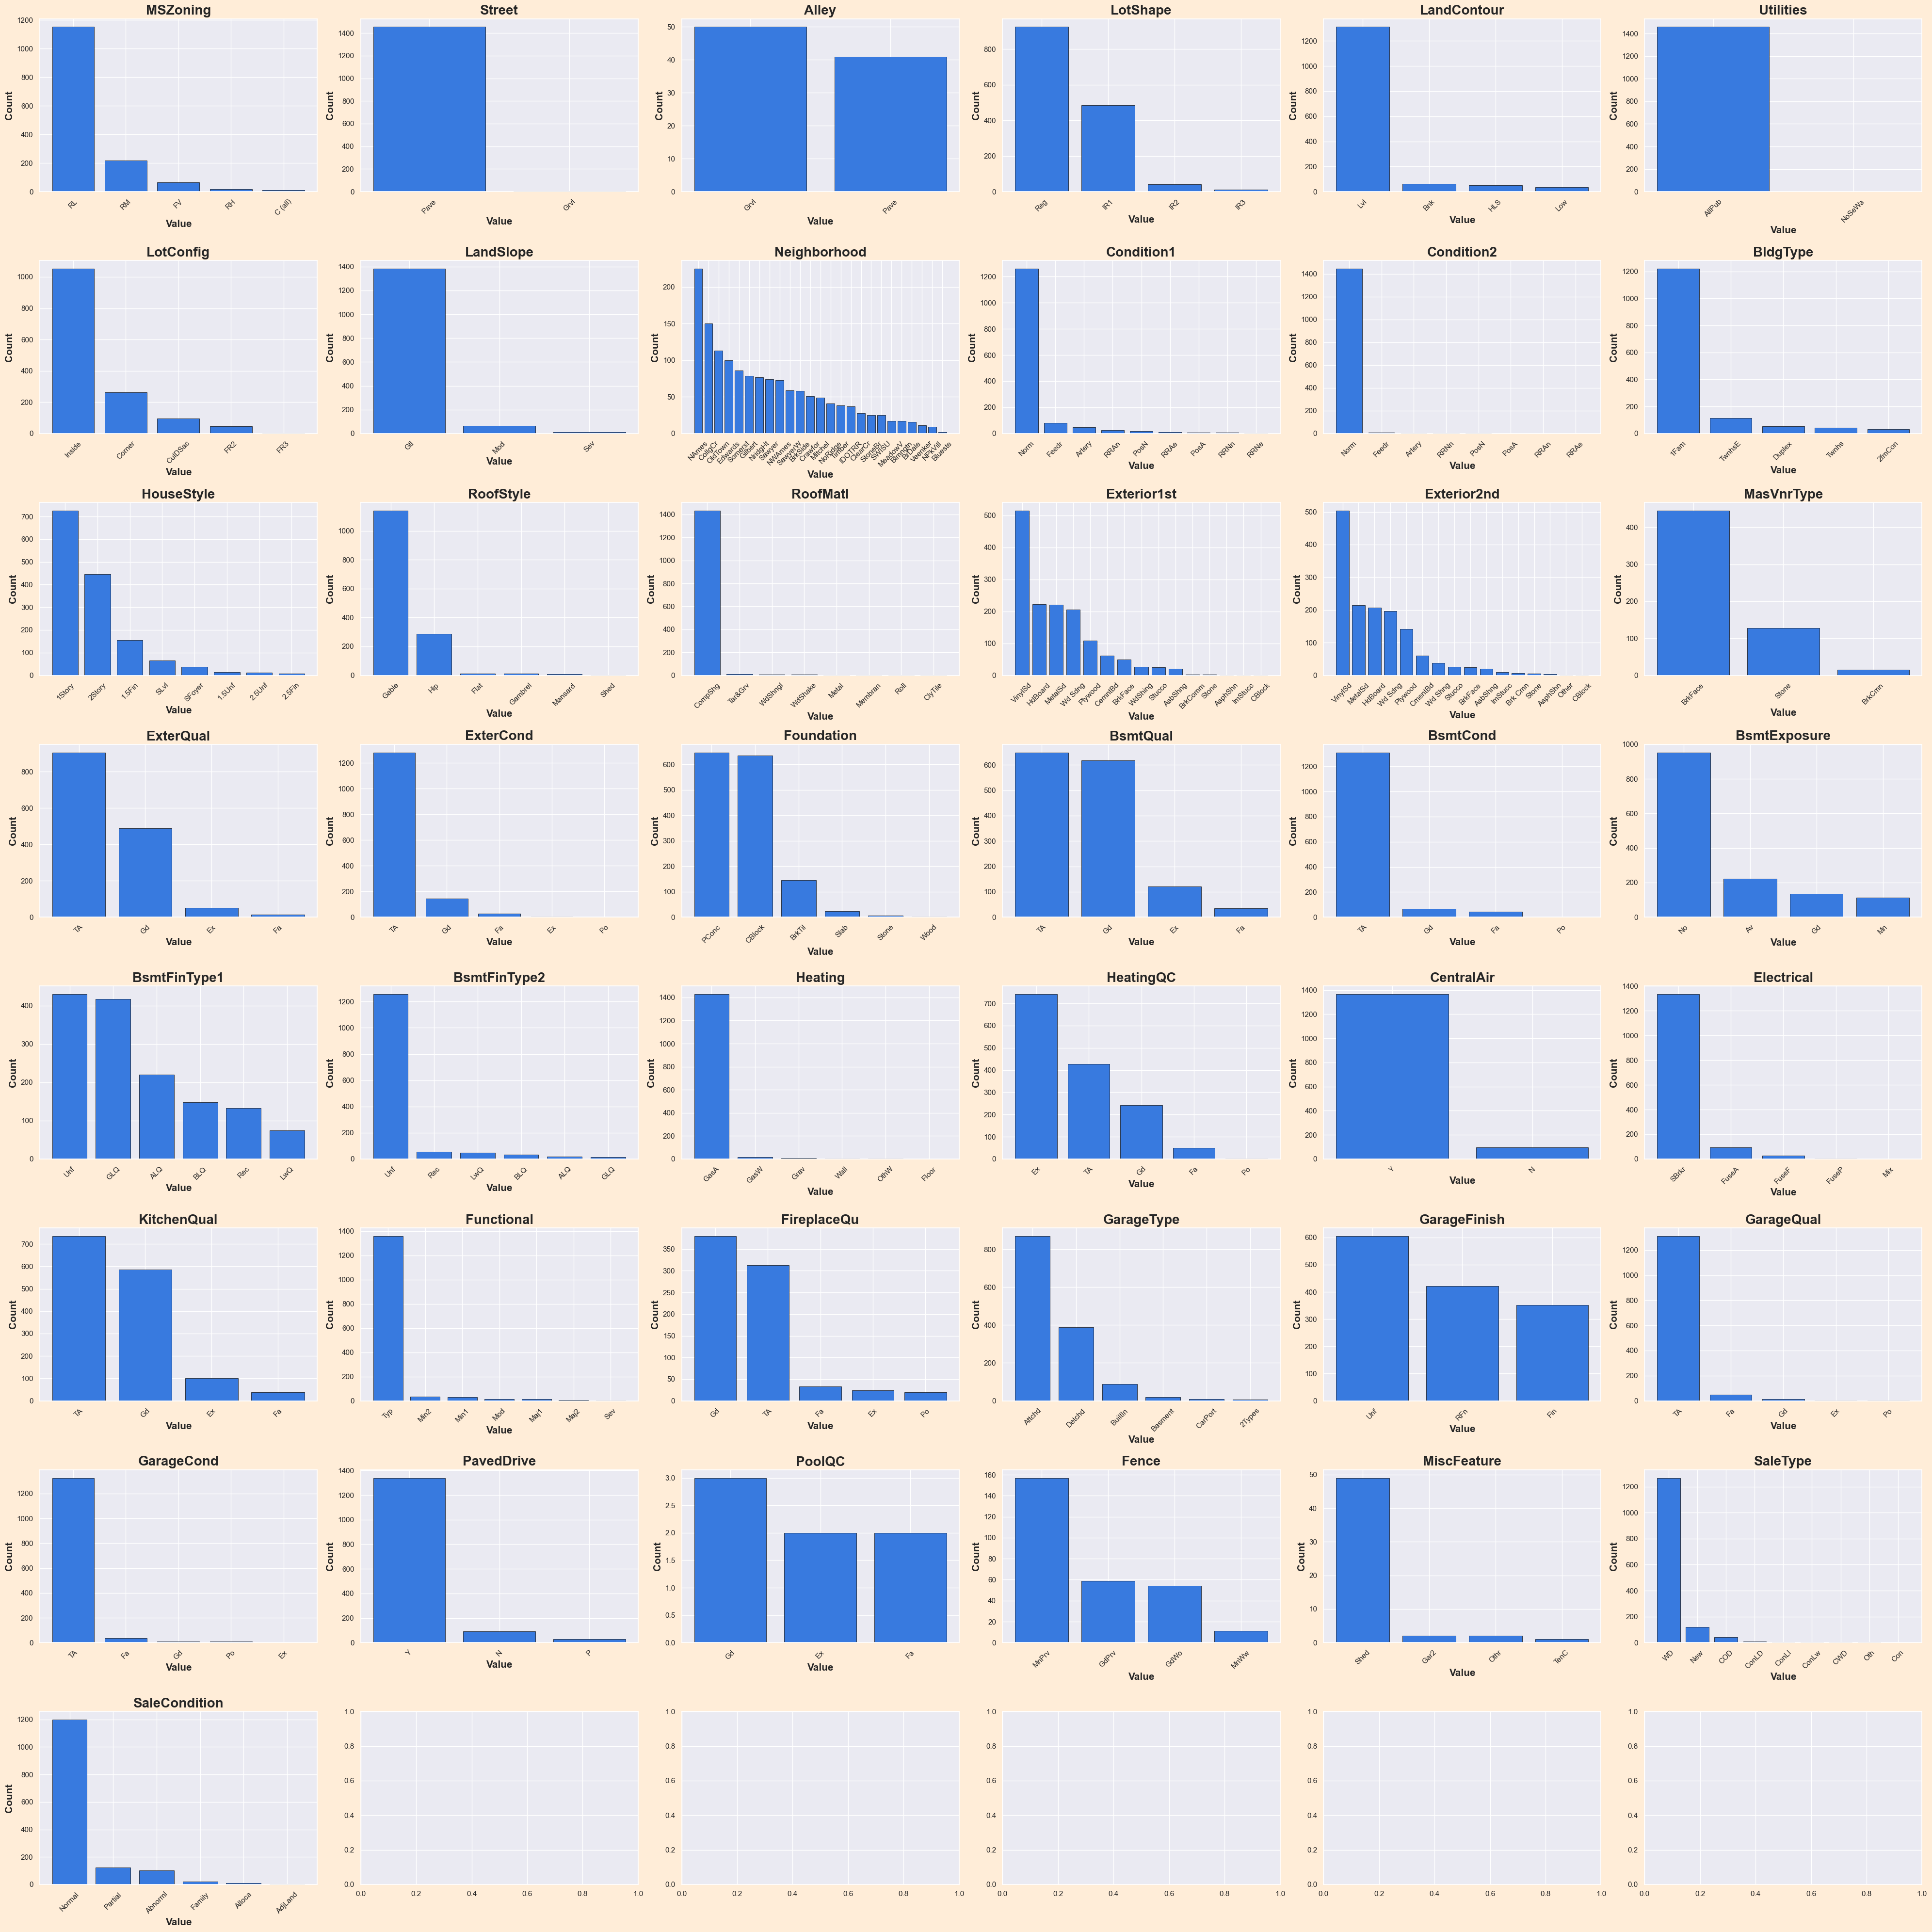

In [71]:
n_cols = 6
n_rows = len(categorical_df.columns) // n_cols + (len(categorical_df.columns) % n_cols > 0)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(40, n_rows * 5))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(categorical_df.columns):
        col_name = categorical_df.columns[i]
        value_counts = categorical_df[col_name].value_counts()
        ax.bar(value_counts.index, value_counts.values, color = '#387ADF', edgecolor = 'black', linewidth = 0.5)

        ax.set_title(col_name, fontsize=20, fontweight = 'bold')
        ax.set_xlabel('Value', fontsize=15, fontweight = 'bold')
        ax.set_ylabel('Count', fontsize=15, fontweight = 'bold')
        ax.tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

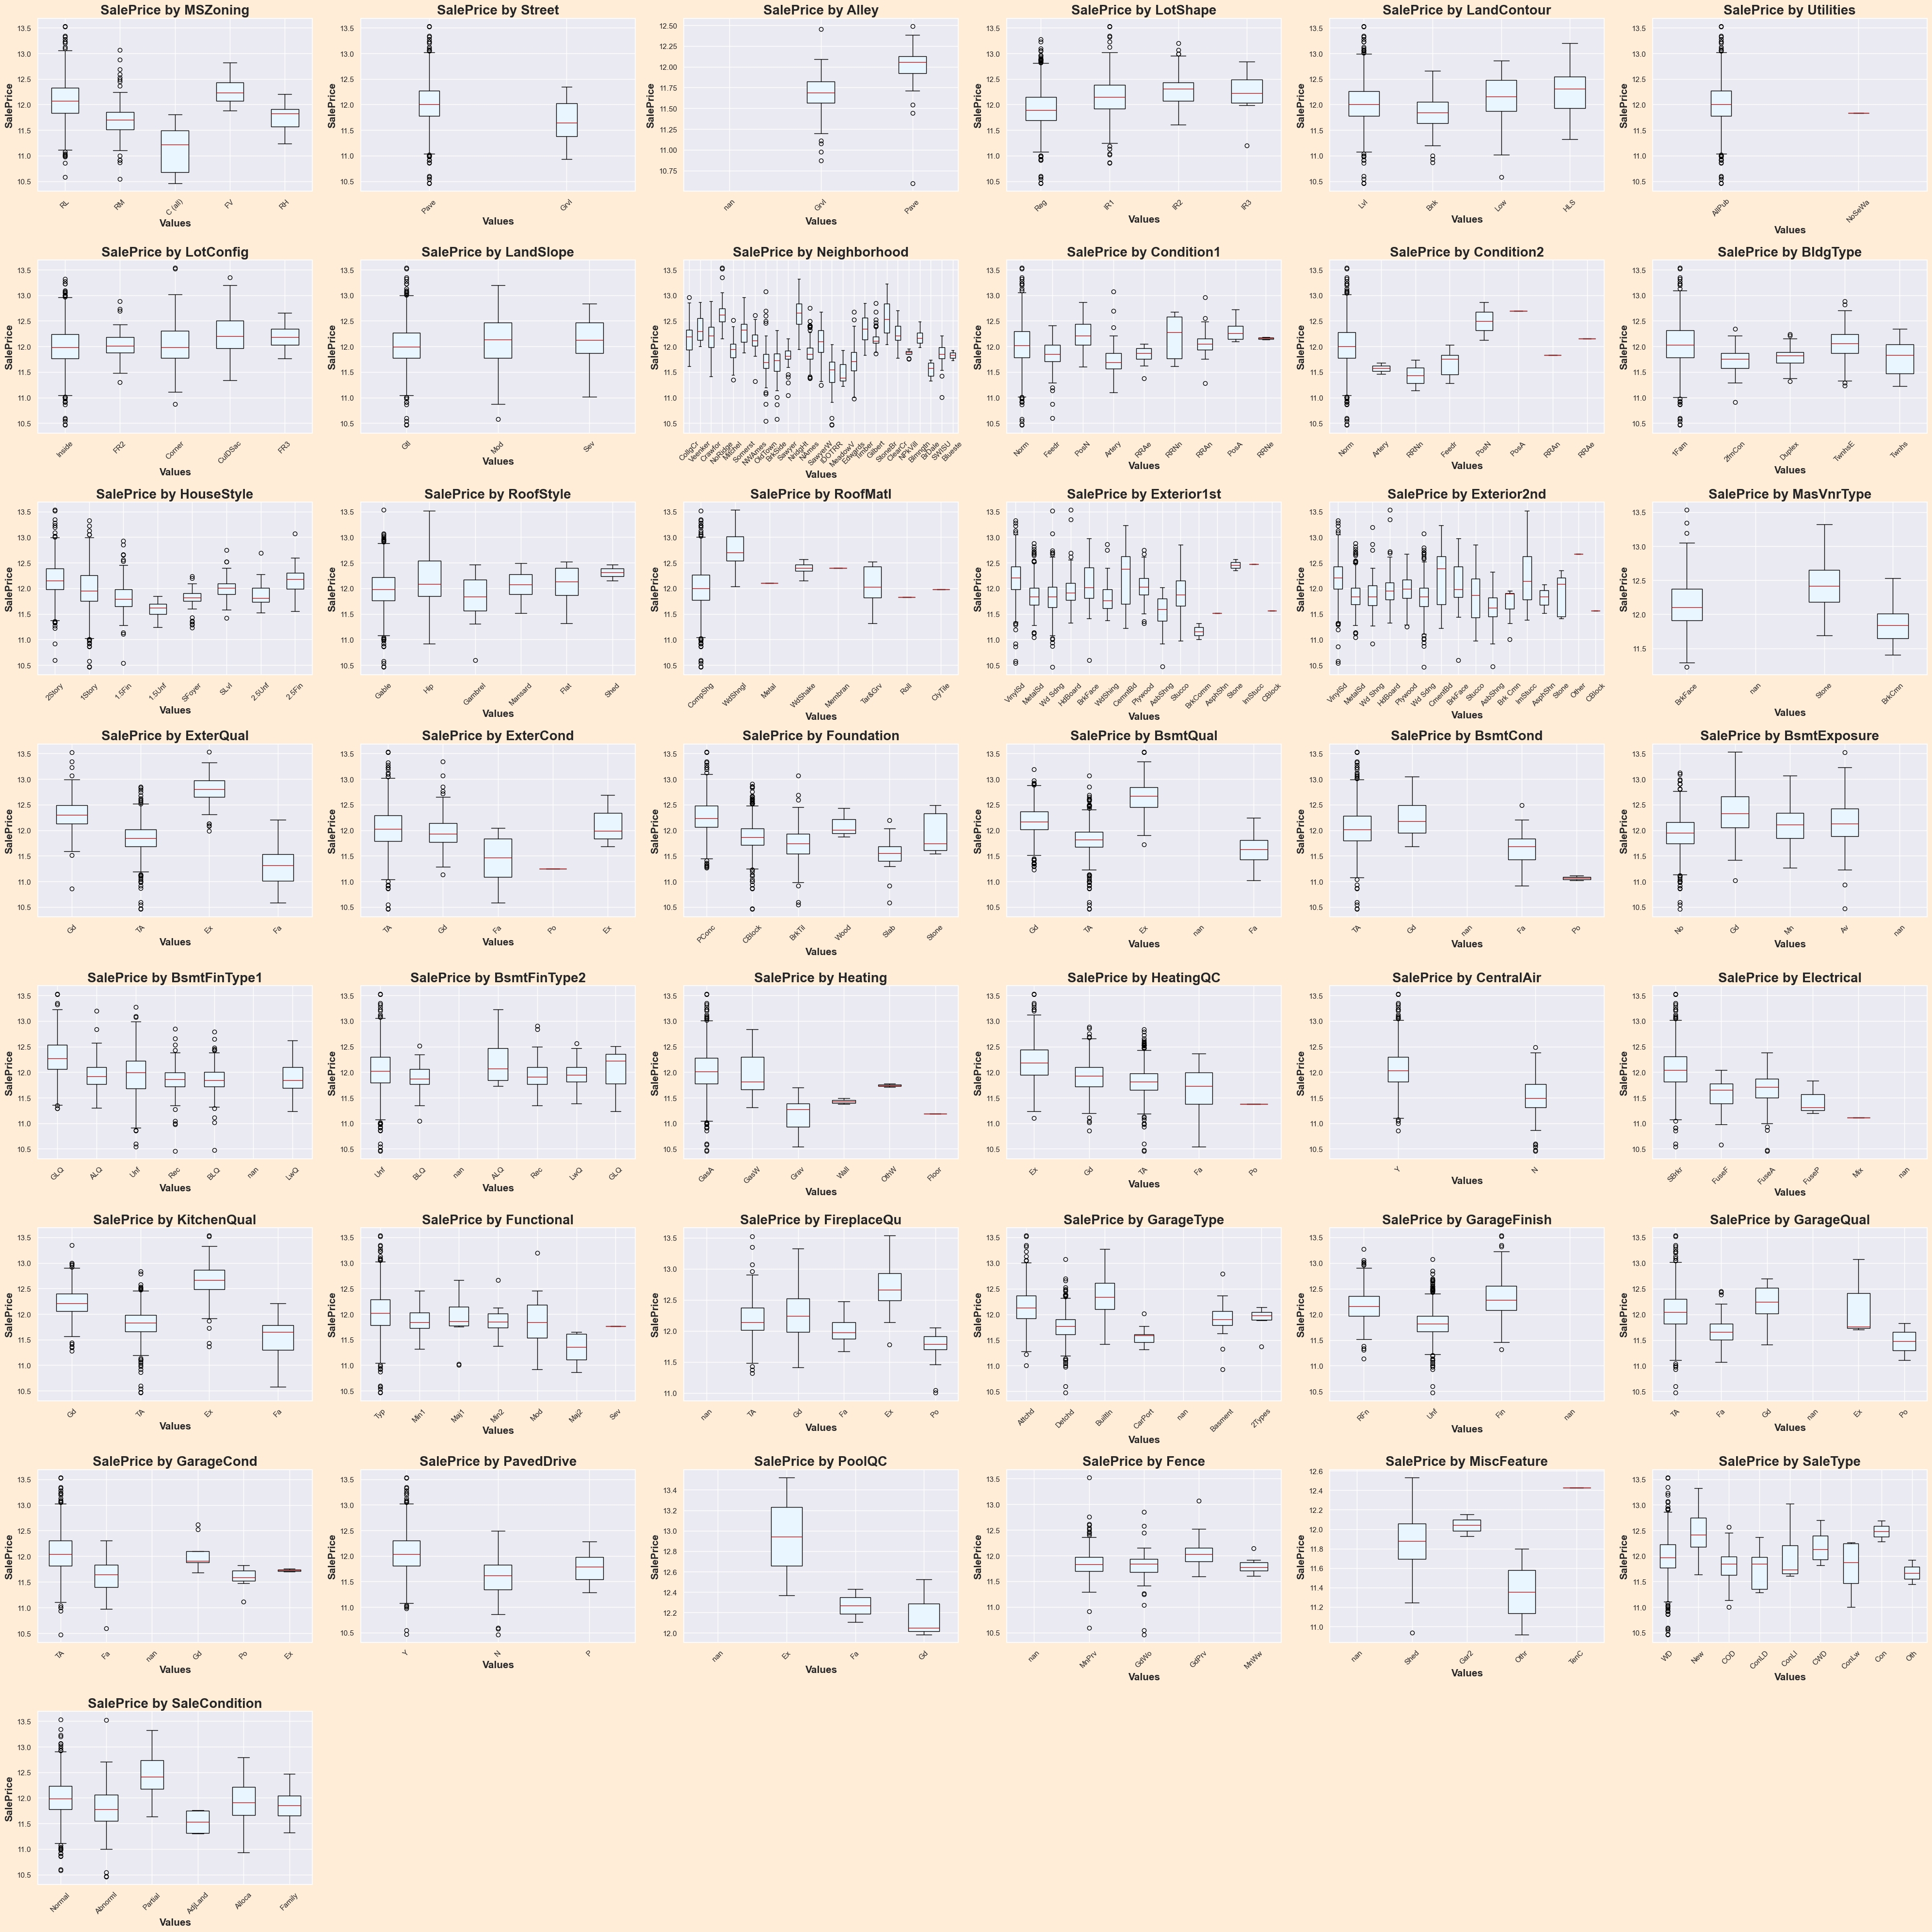

In [73]:
n_cols = 6
n_rows = len(categorical_df.columns) // n_cols + (len(categorical_df.columns) % n_cols > 0)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(40, n_rows * 5))
axes = axes.flatten()


for i, col in enumerate(categorical_df.columns):
    axes[i].boxplot([df_cleaned[df_cleaned[col] == category]['log_SalePrice'] for category in df_cleaned[col].unique()],
                    labels=df_cleaned[col].unique(), notch=False, patch_artist=True, boxprops=dict(facecolor='#E9F6FF'),
            medianprops=dict(color='#B31312', linewidth=1))
    
    axes[i].set_title(f'SalePrice by {col}', fontsize=20, fontweight = 'bold')
    axes[i].set_xlabel('Values', fontsize=15, fontweight = 'bold')
    axes[i].set_ylabel('SalePrice', fontsize=15, fontweight = 'bold')
    plt.setp(axes[i].artists, alpha=0.5, linewidth=2, edgecolor="k")
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [75]:
missing_columns = df_cleaned.columns[df_cleaned.isnull().sum() > 0]
df_cleaned[missing_columns].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [77]:
df_cleaned['MasVnrType'].isnull().sum()

872

In [79]:
df_cleaned[df_cleaned['MasVnrArea'].isnull()]['MasVnrType']


234     NaN
529     NaN
650     NaN
936     NaN
973     NaN
977     NaN
1243    NaN
1278    NaN
Name: MasVnrType, dtype: object

In [81]:
 def fill_nas(df):
    for column in df.columns:
        if column == 'PoolQC':
            df[column] = df[column].fillna('No Pool')
        elif column == 'Electrical':
            df = df[df[column].isnull() != True]
        elif column == 'MasVnrType':
            df[column] = df[column].fillna('No Masonry veneer')
        elif column == 'MasVnrArea':
            df[column] = df[column].fillna('0')
        elif column == 'MiscFeature':
            df[column] = df[column].fillna('No Misc')
        elif column == 'Alley':
            df[column] = df[column].fillna('No Alley')
        elif column == 'Fence':
            df[column] = df[column].fillna('No Fence')
        elif column == 'FireplaceQu':
            df[column] = df[column].fillna('No Fireplace')
        elif column == 'GarageYrBlt': 
            df[column] = df[column].fillna(df[column].mean())
        elif column in ('GarageCond', 'GarageType', 'GarageFinish', 'GarageQual'):
            df[column] = df[column].fillna('No Garage')
        elif column in ( 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
            df[column] = df[column].fillna('No Basement')
        elif column == 'LotFrontage':
            df[column] = df[column].fillna(df[column].mean())

    return df

In [85]:
df_cleaned = fill_nas(df_cleaned)

In [87]:
df_cleaned['MasVnrArea'] = df_cleaned['MasVnrArea'].astype(float)

In [91]:
def add_new_features(df):
    df['YrBltRmd'] = df['YearBuilt'] + df['YearRemodAdd']
    df['Total_Square_Feet'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF'])
    df['Total_Bath'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))
    df['Total_Porch_Area'] = (df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + df['ScreenPorch'] + df['WoodDeckSF'])
    df['exists_pool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
    df['exists_garage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
    df['exists_fireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
    df['exists_bsmt'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
    df['old_house'] = df['YearBuilt'].apply(lambda x: 1 if x <1990 else 0)
    
    return df

In [97]:
df_cleaned = add_new_features(df_cleaned)

In [99]:
df_cleaned.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,log_SalePrice,YrBltRmd,Total_Square_Feet,Total_Bath,Total_Porch_Area,exists_pool,exists_garage,exists_fireplace,exists_bsmt,old_house
0,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,...,12.247694,4006,3272,3.5,61,0,1,0,1,0
1,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,...,12.109011,3952,3502,2.5,298,0,1,1,1,1
2,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,...,12.317167,4003,3192,3.5,42,0,1,1,1,0
3,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,Corner,...,11.849398,3885,2689,2.0,307,0,1,1,1,1
4,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,...,12.429216,4000,3998,3.5,276,0,1,1,1,0


In [103]:
missing_columns = df_cleaned.columns[df_cleaned.isnull().sum() > 0]
df_cleaned[missing_columns].isnull().sum()

Series([], dtype: float64)

In [105]:
y = df_cleaned["log_SalePrice"]
X = df_cleaned.drop("log_SalePrice", axis=1)

In [107]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBat...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))]))])

In [109]:
X_transformed = pipeline.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_transformed, y, 
                                                  test_size=0.2, 
                                                  random_state=42)

In [111]:
param_grid = {
    'n_estimators': [500, 1000, 1500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 6, 8], 
    'min_child_weight': [1, 3],
    'gamma': [0, 0.1, 0.3],
    'subsample': [0.7, 0.8, 0.9], 
    'colsample_bytree': [0.7, 0.8, 0.9], 
    'booster': ['gbtree'],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0.1, 1, 10],
    'base_score': [0.5, 0.75],
}

In [113]:
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train,y_train) 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [115]:
from sklearn.model_selection import RandomizedSearchCV

rs = RandomizedSearchCV(
    estimator=xgb_reg,
    param_distributions=param_grid,
    n_iter=150,
    cv=5, 
    scoring='neg_root_mean_squared_error', 
    n_jobs=4, 
    verbose=5, 
    return_train_score=True, 
    random_state=42 
)

In [117]:
rs.fit(X_train,y_train)

# Get the best parameters and corresponding score
best_params = rs.best_params_
best_score = rs.best_score_

print("Best Parameters:", best_params)
print("Best Score (Negative MSE):", best_score)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best Parameters: {'subsample': 0.7, 'reg_lambda': 0.1, 'reg_alpha': 1, 'n_estimators': 1500, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.8, 'booster': 'gbtree', 'base_score': 0.75}
Best Score (Negative MSE): -0.1322405099019773


In [118]:
lgbm_param_grid = {
    'num_leaves': [5, 10, 20, 30],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 500, 1000],
    'max_bin': [50, 100, 200],
    'bagging_fraction': [0.6, 0.7, 0.8],
    'bagging_freq': [3, 5, 7],
    'feature_fraction': [0.2, 0.4, 0.6]
}

In [121]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(estimator=lgb.LGBMRegressor(), param_distributions=lgbm_param_grid, n_iter=50, cv=5, n_jobs=-1, scoring='r2', random_state=42)
random_search.fit(X_train, y_train)

print("Best parameters found: ", random_search.best_params_)
print("Best R2 score: ", random_search.best_score_)

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001561 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in

In [122]:
random_search.best_estimator_

LGBMRegressor(bagging_fraction=0.7, bagging_freq=7, feature_fraction=0.2,
              learning_rate=0.01, max_bin=100, n_estimators=1000,
              num_leaves=10)

In [127]:
best_model = rs.best_estimator_

In [129]:
best_lgbm_model = random_search.best_estimator_

In [131]:
best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_val)

In [133]:
mse = mean_squared_error(y_val, y_pred)
mape = mean_absolute_percentage_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print('---------test------------')
print("R²: %.2f" % r2)
print("MSE: %.2f" % mse)
print("RMSE: %.4f" % np.sqrt(mse))
print("MAPE: %.2f" % (mape * 100) + '%')

---------test------------
R²: 0.91
MSE: 0.01
RMSE: 0.1222
MAPE: 0.71%


In [135]:
best_lgbm_model.fit(X_train,y_train)
lgbm_y_pred = best_lgbm_model.predict(X_val)

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001616 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in

In [137]:
mse = mean_squared_error(y_val, lgbm_y_pred)
mape = mean_absolute_percentage_error(y_val, lgbm_y_pred)
r2 = r2_score(y_val, lgbm_y_pred)

print('---------test------------')
print("R²: %.2f" % r2)
print("MSE: %.2f" % mse)
print("RMSE: %.4f" % np.sqrt(mse))
print("MAPE: %.2f" % (mape * 100) + '%')

---------test------------
R²: 0.91
MSE: 0.02
RMSE: 0.1254
MAPE: 0.70%


In [141]:
test_df = pd.read_csv("test.csv")
cleaned_test_df = fill_nas(test_df)
cleaned_test_df = add_new_features(cleaned_test_df)
cleaned_test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SaleCondition,YrBltRmd,Total_Square_Feet,Total_Bath,Total_Porch_Area,exists_pool,exists_garage,exists_fireplace,exists_bsmt,old_house
0,1461,20,RH,80.0,11622,Pave,No Alley,Reg,Lvl,AllPub,...,Normal,3922,2390.0,1.0,260,0,1,0,1,1
1,1462,20,RL,81.0,14267,Pave,No Alley,IR1,Lvl,AllPub,...,Normal,3916,3581.0,1.5,429,0,1,0,1,1
2,1463,60,RL,74.0,13830,Pave,No Alley,IR1,Lvl,AllPub,...,Normal,3995,3348.0,2.5,246,0,1,1,1,0
3,1464,60,RL,78.0,9978,Pave,No Alley,IR1,Lvl,AllPub,...,Normal,3996,3132.0,2.5,396,0,1,1,1,0
4,1465,120,RL,43.0,5005,Pave,No Alley,IR1,HLS,AllPub,...,Normal,3984,2823.0,2.0,226,0,1,0,1,0


In [143]:
preprocessed_test_df = pipeline.transform(cleaned_test_df)

In [145]:
y_test_xgb_pred = best_model.predict(preprocessed_test_df)
y_test_lgbm_pred = best_lgbm_model.predict(preprocessed_test_df)

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


In [147]:
final_pred = y_test_xgb_pred*0.5 + y_test_lgbm_pred*0.5

In [149]:
y_test_pred_reverted = np.exp(final_pred)
y_test_pred_reverted[0:10]

array([125656.93998755, 162050.16836571, 185523.9962081 , 196925.82276968,
       189483.01700113, 177778.76792484, 179280.43012623, 168598.14281385,
       182401.15690104, 122540.54107361])

In [155]:
submission = pd.read_csv('sample_submission.csv')
submission['SalePrice'] = y_test_pred_reverted
submission.to_csv("submission.csv", index = False)
submission.head(100)

,Id,SalePrice
0,1461,125656.939988
1,1462,162050.168366
2,1463,185523.996208
3,1464,196925.822770
4,1465,189483.017001
...,...,...
95,1556,81909.456553
96,1557,107313.156544
97,1558,93410.205953
98,1559,90834.232833
